# Fig 2. TS and SEEPS

In [1]:
import os
import sys
import yaml
import argparse
from glob import glob
from datetime import datetime, timedelta

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
%matplotlib inline

sys.path.insert(0, os.path.realpath('../libs/'))
import graph_utils as gu
import verif_utils as vu

In [2]:
import cmaps
# graph tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.colorbar as cbar
import matplotlib.ticker as ticker
import matplotlib.lines as mlines

from matplotlib.patches import Rectangle
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

%matplotlib inline

In [3]:
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 1.5
#mpl.rcParams['hatch.linewidth'] = 1.0

### Load config

In [4]:
config_name = os.path.realpath('plot_config.yml')

with open(config_name, 'r') as stream:
    conf = yaml.safe_load(stream)

### Figure settings

In [5]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = conf['figure']['keys']['dpi']
else:
    dpi_ = 75

## Data

**Spatial distribution of std (x)**

In [6]:
# ds_static = xr.open_zarr(conf['geo']['geo_file_zarr'])
# grid_lat = ds_static['lat2d'].values
# grid_lon = ds_static['lon2d'].values

# base_dir = '/glade/campaign/cisl/aiml/ksha/CREDIT_cp/'
# ds_std = xr.open_dataset(base_dir+'VERIF/fuxi_w_physics/TP_std_120h_fuxi_physics.nc')
# STD_plevel_phy = ds_std['mean'].values

# ds_std = xr.open_dataset(base_dir+'VERIF/fuxi_mlevel_dry/TP_std_120h_fuxi_mlevel_dry.nc')
# STD_mlevel_dry = ds_std['mean'].values

# ds_std = xr.open_dataset(base_dir+'VERIF/fuxi_mlevel_physics/TP_std_120h_fuxi_mlevel_physics.nc')
# STD_mlevel_phy = ds_std['mean'].values

# ds_std = xr.open_dataset(base_dir+'/VERIF/IMERG/TP_std_2020_2021_IMERG.nc')
# STD_IMERG = ds_std['mean'].values

# ds_std = xr.open_dataset(
#     '/glade/campaign/cisl/aiml/ksha/CREDIT_physics/VERIF/IFS/TP_std_120h_IFS.nc'
# )
# STD_IFS = ds_std['mean'].values

**TS and SEEPS**

In [7]:
base_dir = '/glade/campaign/cisl/aiml/ksha/CREDIT_cp/'
SEEPS_IMERG = np.load(base_dir+'PLOT_data/SEEPS_IMERG_2020_2021.npy', allow_pickle=True)[()]
TS_IMERG = np.load(base_dir+'PLOT_data/TS_IMERG_2020_2021.npy', allow_pickle=True)[()]

TS threshold

In [8]:
list_thres = 1e-3*np.array([0.1, 0.25, 0.5, 1, 2, 3, 4, 5, 7, 10, 15, 20, 25])

In [9]:
SEEPS_IMERG.keys()

dict_keys(['IMERG_IFS', 'IMERG_plevel_phy', 'IMERG_mlevel_dry', 'IMERG_mlevel_phy'])

In [10]:
TS_IMERG['IFS'].shape

(10, 13, 3)

## Plot

In [11]:
# grid_shape = grid_lat.shape
my_colors = gu.ksha_color_set_summon(color_set=0)

red = my_colors['red'] # fuxi-mlevel-physics
orange = my_colors['orange'] # fuxi-mlevel-base
blue = my_colors['blue'] # fuxi-plevel-physics
gray = '0.75' # IFS

In [12]:
# line specs
line_keys = {}
line_keys['IFS'] = {
    'linewidth': 5, 'linestyle': '-', 'color': gray, 'alpha': 1, 'zorder': 2, 'label': ''
}
line_keys['fuxi_physics'] = {
    'linewidth': 4, 'linestyle': '--', 'color': blue, 'alpha': 1, 'zorder': 4, 'label': ''
}
line_keys['fuxi_mlevel_physics'] = {
    'linewidth': 4, 'linestyle': '--', 'color': red, 'alpha': 1, 'zorder': 5, 'label': ''
}
line_keys['fuxi_mlevel_dry'] = {
    'linewidth': 4, 'linestyle': '-', 'color': orange, 'alpha': 1, 'zorder': 3, 'label': ''
}

# lead time settings
LEADs = np.arange(24, 240+24, 24)
N_leads = len(LEADs)
LEAD_ticks = np.arange(24, 240+24, 24)#[::3]

# # legend names
# legend_labels = [
#     'IFS', 'FuXi-base', 'FuXi-physics'
# ]
# # colormap
# CMAP = cmaps.hotcolr_19lev

model_name_keys = ['IFS', 'fuxi_physics', 'fuxi_mlevel_physics', 'fuxi_mlevel_dry']

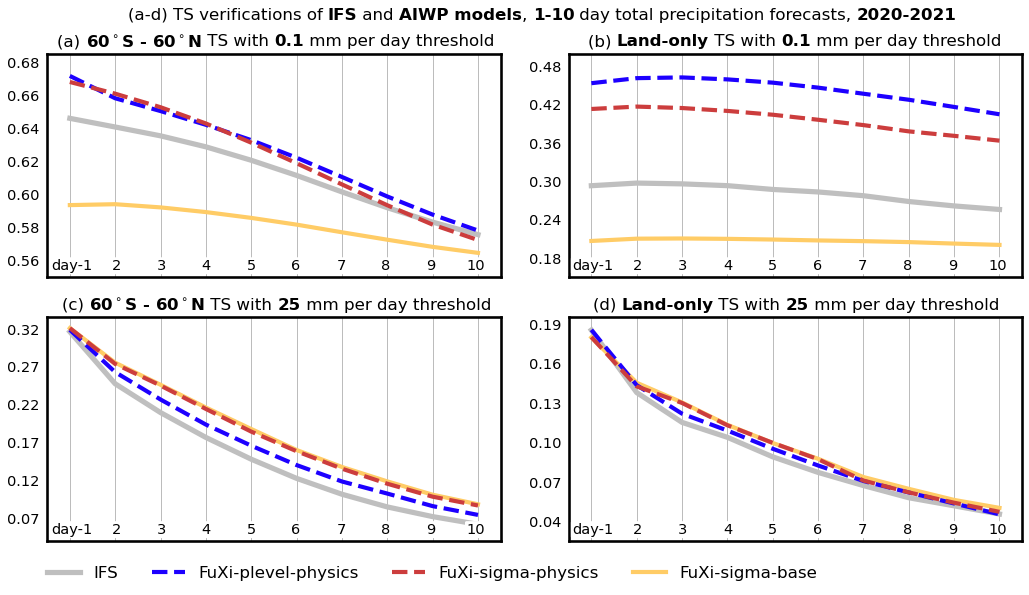

In [13]:
handles = []

fig = plt.figure(figsize=(13, 6.5), dpi=dpi_)
gs = gridspec.GridSpec(
    3, 2, 
    height_ratios=[1, 0.18, 1], 
    width_ratios=[1, 1]
)

AX_TS_01 = []
AX_TS_01.append(plt.subplot(gs[0, 0]))
AX_TS_01.append(plt.subplot(gs[0, 1]))

AX_TS_25 = []
AX_TS_25.append(plt.subplot(gs[2, 0]))
AX_TS_25.append(plt.subplot(gs[2, 1]))

AX = AX_TS_01 + AX_TS_25

plt.subplots_adjust(0, 0, 1, 1, hspace=0.0, wspace=0.15)

YLIMs = [
    [0.55, 0.685],
    [0.15, 0.5],
    [0.04, 0.335],
    [0.025, 0.195],
    [0.05, 0.55],
    [-0.07, 0.07]
]

YTICKs = [
    [0.56, 0.58, 0.60, 0.62, 0.64, 0.66, 0.68],
    [0.18, 0.24, 0.3, 0.36, 0.42, 0.48],
    [0.07, 0.12, 0.17, 0.22, 0.27, 0.32],
    [0.04, 0.07, 0.1, 0.13, 0.16, 0.19],
    [0.10, 0.20, 0.30, 0.40, 0.50],
    [-0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06]
    
]

for i_ax, ax in enumerate(AX):
    ax = gu.ax_decorate_box(ax)
    # tick param config
    ax.tick_params(labelleft=True, labelsize=14)
    
    ax.set_xticks(LEAD_ticks)
    ax.set_xlim([LEAD_ticks[0]-12, LEAD_ticks[-1]+12])
    ax.set_ylim(YLIMs[i_ax])
    ax.set_yticks(YTICKs[i_ax])
    ax.xaxis.grid(False)
    ax.grid(':', axis='x')

y_loc = 0.02
x_locs = np.linspace(0.0535, 0.945, len(LEAD_ticks))

x_labels = ['day-1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

for i_ax, ax in enumerate(AX):
    for i_lead, lead in enumerate(LEAD_ticks):
        ax.text(
            x_locs[i_lead], y_loc, x_labels[i_lead], ha='center', va='bottom', fontsize=14,
            bbox=dict(facecolor='white', linewidth=0, boxstyle='round,pad=0.1'),
            transform=ax.transAxes
        )

model_names = ['IFS', 'fuxi_physics', 'fuxi_mlevel_physics', 'fuxi_mlevel_dry']
for name in model_names:
    for i_ax in range(2):
        if i_ax == 0:
            i_var = 2
        else:
            i_var = 1
        AX_TS_01[i_ax].plot(LEADs, TS_IMERG[name][:10, 0, i_var], **line_keys[name])
        AX_TS_25[i_ax].plot(LEADs, TS_IMERG[name][:10, -1, i_var], **line_keys[name])

# Overall titles
fontsize_list = [16,]*10
fontweight_list = ['normal', 'bold']*5

ax_title0 = fig.add_axes([0.0, 1.07, 1.0, 0.025])
title_len = 0.835
handles += gu.string_partial_format(
    fig, ax_title0, 0.5*(1-title_len), 1.0, 'left', 'top', 
    [
        '(a-d) TS verifications of ',
        'IFS',
        ' and ', 
        'AIWP models',
        ', ',
        '1-10',
        ' day total precipitation forecasts, ', 
        '2020-2021',
    ], 
    ['k', 'k', 'k', 'k', 'k', 'k', 'k', 'k'], 
    fontsize_list, 
    fontweight_list
)


ax_title1 = fig.add_axes([0.0, 1.015, 0.465, 0.025])
title_len = 0.42
handles += gu.string_partial_format(
    fig, ax_title1, 0.5*(0.465-title_len), 1.0, 'left', 'top', 
    [
        '(a) ',
        '60$^\circ$S - 60$^\circ$N',
        ' TS with ',
        '0.1',
        ' mm per day threshold',
    ], 
    ['k', 'k', 'k', 'k', 'k'], 
    fontsize_list, 
    fontweight_list
)

ax_title2 = fig.add_axes([1-0.465, 1.015, 0.465, 0.025])
title_len = 0.38
handles += gu.string_partial_format(
    fig, ax_title2, 0.5*(0.465-title_len), 1.0, 'left', 'top', 
    [
        '(b) ',
        'Land-only',
        ' TS with ',
        '0.1',
        ' mm per day threshold',
    ], 
    ['k', 'k', 'k', 'k', 'k'], 
    fontsize_list, 
    fontweight_list
)


ax_title3 = fig.add_axes([0.0, 0.475, 0.465, 0.025])
title_len = 0.4
handles += gu.string_partial_format(
    fig, ax_title3, 0.5*(0.465-title_len), 1.0, 'left', 'top', 
    [
        '(c) ',
        '60$^\circ$S - 60$^\circ$N',
        ' TS with ',
        '25',
        ' mm per day threshold',
    ], 
    ['k', 'k', 'k', 'k', 'k'], 
    fontsize_list, 
    fontweight_list
)

ax_title4 = fig.add_axes([1-0.465, 0.475, 0.465, 0.025])
title_len = 0.36
handles += gu.string_partial_format(
    fig, ax_title4, 0.5*(0.465-title_len), 1.0, 'left', 'top', 
    [
        '(d) ',
        'Land-only',
        ' TS with ',
        '25',
        ' mm per day threshold',
    ], 
    ['k', 'k', 'k', 'k', 'k'], 
    fontsize_list, 
    fontweight_list
)

handle_legneds1 = []
handle_legneds1.append(mlines.Line2D([], [], **line_keys['IFS']))
handle_legneds1.append(mlines.Line2D([], [], **line_keys['fuxi_physics']))
handle_legneds1.append(mlines.Line2D([], [], **line_keys['fuxi_mlevel_physics']))
handle_legneds1.append(mlines.Line2D([], [], **line_keys['fuxi_mlevel_dry']))

ax_lg1 = fig.add_axes([0.0, -0.06, 0.805, 0.04])
LG1 = ax_lg1.legend(
    handle_legneds1, ['IFS', 'FuXi-plevel-physics', 'FuXi-sigma-physics', 'FuXi-sigma-base'], 
    bbox_to_anchor=(1, 1), ncol=4, prop={'size':16})


ax_title0.set_axis_off()
ax_title1.set_axis_off()
ax_title2.set_axis_off()
ax_title3.set_axis_off()
ax_title4.set_axis_off()
LG1 = gu.lg_box(LG1)
ax_lg1.set_axis_off()